In [69]:
import mlflow
from mlflow.entities import ViewType
import seaborn as sns
from IPython.display import Image, display

In [70]:
mlflow.get_registry_uri()

'https://bockstaller.cc'

In [71]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

/Users/bockstaller/code/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Outlier


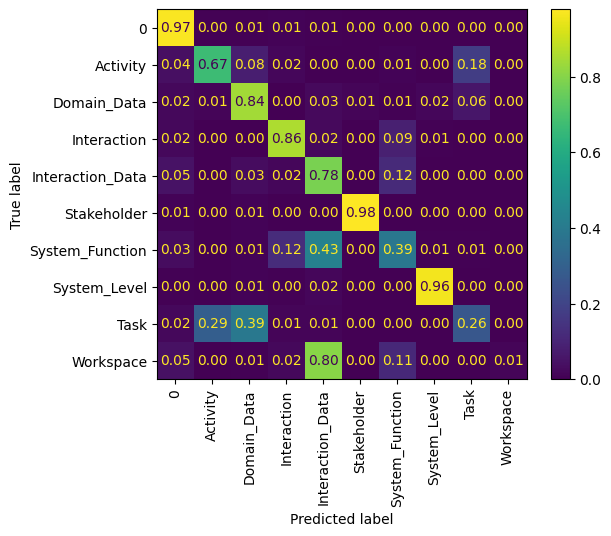

Selected


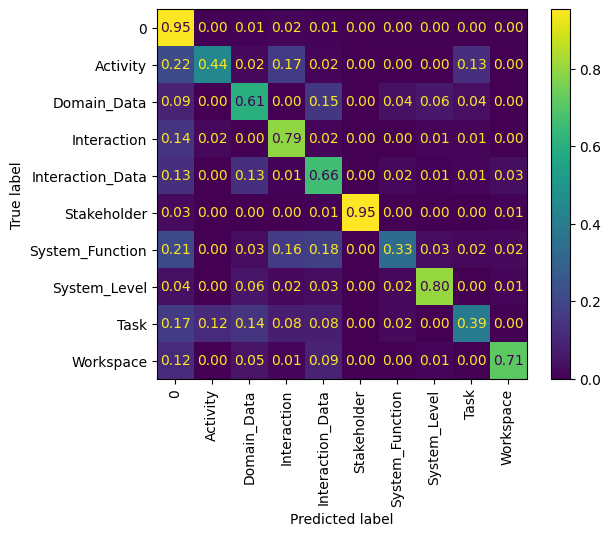

8625a89598dd4240be3245266e0479b0
     Number of Epochs Train Batch Size LR BERT  LR Classifier  Weight Decay  \
221                 5                8   3e-05           0.16           0.1   

     Layer Count  Mean Recall  Mean Precision        F1  Selected  
221            1     0.663819        0.653889  0.658816  Selected  


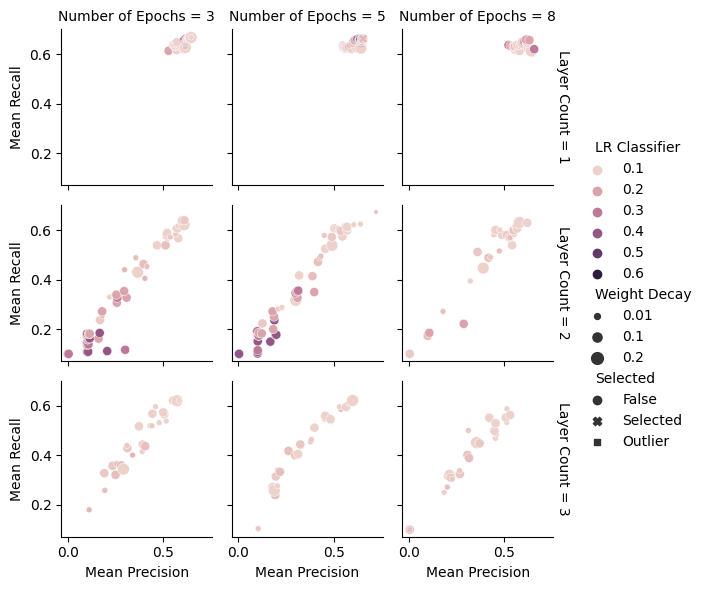

In [72]:
experiment = mlflow.get_experiment_by_name(
    "v2_2ndStageDualModelBertParameterSweep"
)
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "params.bert.number_epochs",
        "params.bert.train_batch_size",
        "params.bert.learning_rate_bert",
        "params.bert.learning_rate_classifier",
        "params.bert.weight_decay",
        "params.bert.num_layers",
        "metrics.mean_recall",
        "metrics.mean_precision",
    ]
]
presentation_dataset.rename(
    columns={
        "params.bert.number_epochs": "Number of Epochs",
        "params.bert.train_batch_size": "Train Batch Size",
        "params.bert.learning_rate_bert": "LR BERT",
        "params.bert.learning_rate_classifier": "LR Classifier",
        "params.bert.num_layers": "Layer Count",
        "params.bert.weight_decay": "Weight Decay",
        "metrics.mean_recall": "Mean Recall",
        "metrics.mean_precision": "Mean Precision",
    },
    inplace=True,
)

presentation_dataset["Layer Count"] = presentation_dataset[
    "Layer Count"
].astype("int32")
presentation_dataset["Layer Count"] = presentation_dataset["Layer Count"] + 1


presentation_dataset["Number of Epochs"] = presentation_dataset[
    "Number of Epochs"
].astype("int32")
presentation_dataset["Weight Decay"] = presentation_dataset[
    "Weight Decay"
].astype("float32")
presentation_dataset["LR Classifier"] = presentation_dataset[
    "LR Classifier"
].astype("float32")


presentation_dataset["F1"] = (
    2
    * presentation_dataset["Mean Precision"]
    * presentation_dataset["Mean Recall"]
) / (
    presentation_dataset["Mean Precision"]
    + presentation_dataset["Mean Recall"]
)
presentation_dataset.sort_values(by="F1", ascending=False, inplace=True)


presentation_dataset["Selected"] = "False"
presentation_dataset.iloc[
    0, presentation_dataset.columns.get_loc("Selected")
] = "Outlier"
presentation_dataset.iloc[
    1, presentation_dataset.columns.get_loc("Selected")
] = "Selected"
presentation_dataset.sort_values(by="F1", ascending=True, inplace=True)

fg = sns.relplot(
    data=presentation_dataset,
    x="Mean Precision",
    y="Mean Recall",
    col="Number of Epochs",
    row="Layer Count",
    hue="LR Classifier",
    hue_norm=(0.1, 0.6),
    size="Weight Decay",
    style="Selected",
    facet_kws={"margin_titles": True},
    height=2,
    kind="scatter",
)
selected_run = dataset_all_runs.loc[
    presentation_dataset["Selected"] == "Outlier"
]
run_id = selected_run["run_id"].values[0]
path = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
print("Outlier")
display(Image(filename=path))

selected_run = dataset_all_runs.loc[
    presentation_dataset["Selected"] == "Selected"
]
run_id = selected_run["run_id"].values[0]
path = mlflow.artifacts.download_artifacts(
    run_id=run_id, artifact_path="confusion_matrix.png"
)
print("Selected")
display(Image(filename=path))

print(run_id)

best_bert = presentation_dataset.loc[
    presentation_dataset["Selected"] == "Selected"
]
outlier_bert = presentation_dataset.loc[
    presentation_dataset["Selected"] == "Outlier"
]

print(best_bert)

In [73]:
print(outlier_bert)

     Number of Epochs Train Batch Size LR BERT  LR Classifier  Weight Decay  \
100                 5                8   3e-05           0.14          0.01   

     Layer Count  Mean Recall  Mean Precision        F1 Selected  
100            2     0.672843        0.720471  0.695843  Outlier  


In [74]:
print(best_bert)

     Number of Epochs Train Batch Size LR BERT  LR Classifier  Weight Decay  \
221                 5                8   3e-05           0.16           0.1   

     Layer Count  Mean Recall  Mean Precision        F1  Selected  
221            1     0.663819        0.653889  0.658816  Selected  


In [75]:
presentation_dataset

,Number of Epochs,Train Batch Size,LR BERT,LR Classifier,Weight Decay,Layer Count,Mean Recall,Mean Precision,F1,Selected
78,3,16,3e-05,0.40,0.10,2,0.100000,0.000939,0.001860,False
68,3,8,3e-05,0.30,0.10,2,0.100000,0.003442,0.006656,False
56,5,16,3e-05,0.30,0.10,2,0.100000,0.003478,0.006723,False
48,5,16,3e-05,0.40,0.10,2,0.100000,0.003478,0.006723,False
26,8,8,3e-05,0.14,0.10,3,0.100000,0.004685,0.008951,False
...,...,...,...,...,...,...,...,...,...,...
276,3,8,3e-05,0.10,0.20,1,0.668726,0.645592,0.656955,False
261,5,8,3e-05,0.14,0.10,1,0.661815,0.653015,0.657385,False
335,3,8,3e-05,0.10,0.01,1,0.669963,0.645945,0.657735,False
221,5,8,3e-05,0.16,0.10,1,0.663819,0.653889,0.658816,Selected
